In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch

path = 'runs/continuous_lunar_lander/20231220_115303'

In [4]:
import os 
max_generation = max([int(file.split('_')[-1].split('.')[0]) for file in os.listdir(path)])
  

In [5]:
fitness_per_generation = []
max_number_of_species = 0
number_of_individuals = None
max_fitness = -np.inf
min_fitness = np.inf
for generation in range(max_generation):
    fitness_per_species = torch.load(f'{path}/fitness_perspecies_{generation}.pt')
    fitness_per_species = {sp:v[0] for sp,v in fitness_per_species.items()}
    max_number_of_species = max(max_number_of_species, len(fitness_per_species))
    
    max_fitness = max(max_fitness, max([max(fitness) for fitness in fitness_per_species.values()]))
    # print max fitness generation and species
    print(f'generation {generation} max fitness {max([max(fitness) for fitness in fitness_per_species.values()])} species {max(fitness_per_species, key=lambda x: len(fitness_per_species[x]))}')
    min_fitness = min(min_fitness, min([min(fitness) for fitness in fitness_per_species.values()]))
    assert number_of_individuals == sum([len(fitness) for fitness in fitness_per_species.values()]) or number_of_individuals is None
    number_of_individuals = sum([len(fitness) for fitness in fitness_per_species.values()])

/home/amos/miniconda3/envs/neat/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


generation 0 max fitness -95.08318839427214 species 0
generation 1 max fitness -93.66949748253376 species 0
generation 2 max fitness -85.89727914131586 species 0
generation 3 max fitness -63.13427912857122 species 0
generation 4 max fitness -80.22014346844004 species 0
generation 5 max fitness -71.30385569358153 species 0
generation 6 max fitness -70.3371555837052 species 0
generation 7 max fitness -86.82541835918198 species 0
generation 8 max fitness -72.5589019815751 species 0
generation 9 max fitness -64.99405650872954 species 0
generation 10 max fitness -72.26506563396683 species 0
generation 11 max fitness -48.83791658078643 species 0
generation 12 max fitness -57.125601423636795 species 0
generation 13 max fitness -64.01120167826619 species 0
generation 14 max fitness -48.30418504615851 species 0
generation 15 max fitness -35.98160027423958 species 0
generation 16 max fitness -30.933664937215458 species 0
generation 17 max fitness -36.97066024203599 species 0
generation 18 max fi

In [6]:
width = number_of_individuals + max_number_of_species-1 # white border between
height = max_generation + 1
heatmap = np.zeros((height, width))
for generation in range(max_generation):
    fitness_per_species = torch.load(f'{path}/fitness_perspecies_{generation}.pt')
    fitness_per_species = {sp:v[0] for sp,v in fitness_per_species.items()}
    num_species = len(fitness_per_species)
    position_counter = 0
    min_fitness_in_run = min([min(fitness) for fitness in fitness_per_species.values()])
    for fitnesses in fitness_per_species.values():
        
        # sort by fitness
        fitnesses = sorted(fitnesses)
        fitnesses = [0 if fitness < 0 else fitness for fitness in fitnesses]
        # normalize by max and min fitness
        fitnesses = [(fitness)/(max_fitness) for fitness in fitnesses]
        #fitnesses = [1 if fitness > 0.9 else 0 for fitness in fitnesses]
        
        for fitness in fitnesses:
            heatmap[generation, position_counter] = fitness
            position_counter += 1
        
        if position_counter < width:
            heatmap[generation, position_counter] = 0.5
        position_counter += 1 # white border between species
    

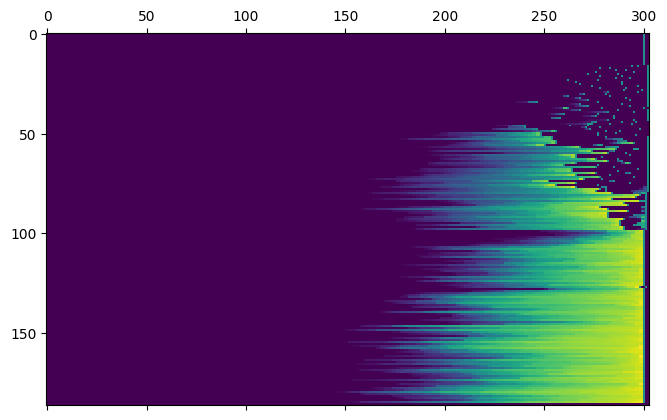

In [7]:


plt.matshow(heatmap)
plt.show()

In [8]:
# plot max fitness per species and generation

max_fitness_per_species = {}

for generation in range(max_generation):
    fitness_per_species = torch.load(f'{path}/fitness_perspecies_{generation}.pt')
    fitness_per_species = {sp:v[0] for sp,v in fitness_per_species.items()}
    for species, fitnesses in fitness_per_species.items():
        if species not in max_fitness_per_species:
            max_fitness_per_species[species] = []
        
        fitnesses = [-500 if fitness < -500 else fitness for fitness in fitnesses]
        max_fitness_per_species[species].append((generation,max(fitnesses)))

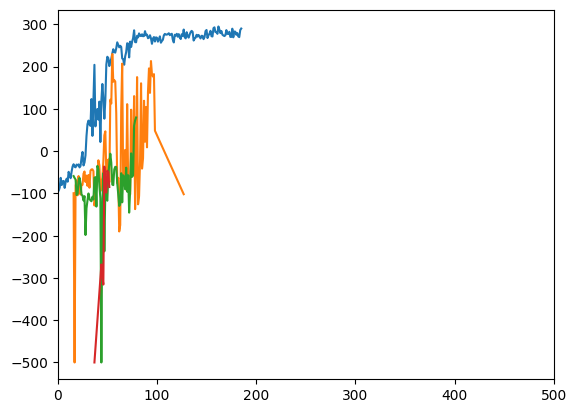

In [9]:
# plot
for species, fitnesses in max_fitness_per_species.items():
    plt.plot([fitness[0] for fitness in fitnesses], [fitness[1] for fitness in fitnesses], label=f'species {species}')
    # figure x lim
    plt.xlim(0, 500)